# Introduction

**Ethereum** is a blockchain platform with its own cryptocurrency, called **Ether** (ETH) or Ethereum, and its own programming language, called Solidity.

As a blockchain network, Ethereum is a **decentralized** public ledger for verifying and recording transactions. The network's users can create, publish, monetize, and use **applications** on the platform, and use its Ether cryptocurrency as payment. Insiders call the decentralized applications on the network "dapps."

As a cryptocurrency, Ethereum is second in market value only to Bitcoin, as of May 2021.

In [1]:
!pip install mpl_finance

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates

/opt/conda/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [3]:
df = pd.read_csv("../input/ethereum-data/ETH-USD.csv",parse_dates=True)

In [4]:
df = df.drop(columns=['Adj Close'])

In [5]:
df.head()

Date      Open      High       Low     Close     Volume
0  2015-08-07  2.831620  3.536610  2.521120  2.772120   164329.0
1  2015-08-08  2.793760  2.798810  0.714725  0.753325   674188.0
2  2015-08-09  0.706136  0.879810  0.629191  0.701897   532170.0
3  2015-08-10  0.713989  0.729854  0.636546  0.708448   405283.0
4  2015-08-11  0.708087  1.131410  0.663235  1.067860  1463100.0

In [6]:
df.describe()

Open         High          Low        Close        Volume
count  2177.000000  2177.000000  2177.000000  2177.000000  2.177000e+03
mean    398.054460   413.880550   380.314871   399.066543  7.125412e+09
std     618.185352   646.694116   585.147027   619.488385  1.065180e+10
min       0.431589     0.482988     0.420897     0.434829  1.021280e+05
25%      13.864300    14.373900    13.254300    13.883900  3.911200e+07
50%     200.608871   206.361450   194.783997   200.634995  2.201160e+09
75%     391.488617   405.616364   381.273834   392.189972  9.818257e+09
max    4174.635742  4362.350586  3785.848633  4168.701172  8.448291e+10

In [7]:
df['100ma'] = df['Close'].rolling(window = 100, min_periods = 0).mean()

In [8]:
df

Date         Open         High          Low        Close  \
0     2015-08-07     2.831620     3.536610     2.521120     2.772120   
1     2015-08-08     2.793760     2.798810     0.714725     0.753325   
2     2015-08-09     0.706136     0.879810     0.629191     0.701897   
3     2015-08-10     0.713989     0.729854     0.636546     0.708448   
4     2015-08-11     0.708087     1.131410     0.663235     1.067860   
...          ...          ...          ...          ...          ...   
2176  2021-07-22  1994.822876  2044.116455  1954.297852  2025.202759   
2177  2021-07-23  2025.105713  2129.441162  2000.436279  2124.776611   
2178  2021-07-24  2123.961182  2197.649414  2107.323486  2189.218750   
2179  2021-07-25  2187.145508  2194.438232  2108.829834  2191.373779   
2180  2021-07-26  2177.329590  2384.400635  2177.329590  2340.090820   

            Volume        100ma  
0     1.643290e+05     2.772120  
1     6.741880e+05     1.762723  
2     5.321700e+05     1.409114  
3     4.052830e+05     1.233947  
4     1.463100e+06     1.200730  
...            ...          ...  
2176  1.749548e+10  2543.801423  
2177  1.620039e+10  2540.698140  
2178  1.605745e+10  2537.399165  
2179  1.456648e+10  2534.993437  
2180  2.389353e+10  2534.945395  

[2181 rows x 7 columns]

# Visualizations

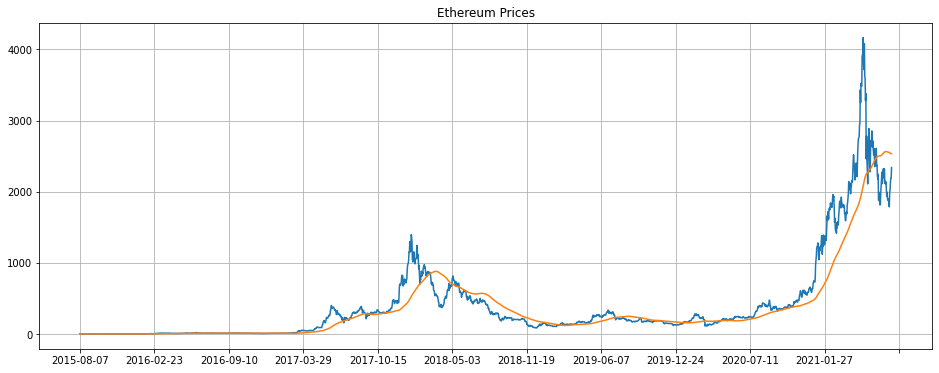

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Close)
ax.plot(df.Date, df['100ma'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Prices')
plt.grid()
plt.show()

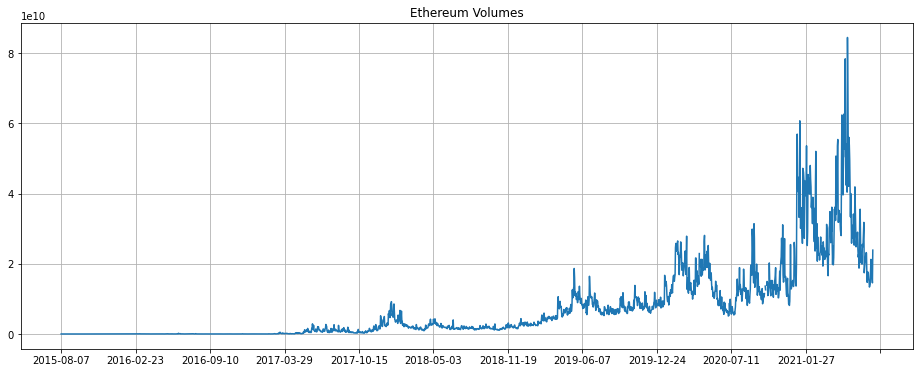

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Volume)
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Ethereum Volumes')
plt.grid()
plt.show()

# Market Cap

In [11]:
df['Total Traded'] = df['Open']*df['Volume']

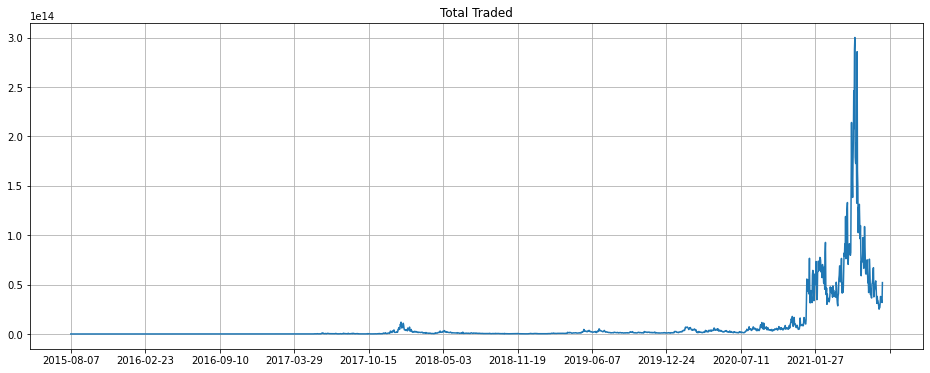

In [12]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['Total Traded'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Total Traded')
plt.grid()
plt.show()

We notice a **huge spike** in Ethereum market cap somewhere in 2021 let's investigate more :

In [13]:
df.iloc[df['Total Traded'].argmax()]

Date                     2021-05-13
Open                    3828.918457
High                    4032.563477
Low                     3549.407227
Close                   3715.148438
Volume                78398214539.0
100ma                   2140.178688
Total Traded    300180370644222.875
Name: 2106, dtype: object

After a quick web search we found out that around 13th March, Ethereum spiked due to the rise of NFTs and DeFi applications to quote from the article : 
> Ethereum’s growth is attributed to an increasing number of developers building **decentralized finance** (DeFi) applications on the Ethereum blockchain platform. The rise of **non-fungible tokens** (NFT) also increases demand for Ethereum.
> Lastly, continued institutional interest in treating crypto like any other security also helps ETH. Coinbase is the new NYSE. ETH is No. 2 on Coinbase after Bitcoin.
> Seeing how the DeFi and NFT movements are directly connected to Ethereum, their increased activity has been the main driver for ETH prices in 2021, says Andrew Moss, GSR Capital’s managing director. “Users need ETH to interact with these technologies, so the more people who are involved with these communities and protocols, the higher the value of ETH goes,” he says.

* Source : https://www.forbes.com/sites/kenrapoza/2021/05/16/ethereum-faces-weekend-rout-but-some-see-eth-doubling-from-here/?sh=6845bee93817

We are going to plot a candlestick plot for Ethereum prices from April 2021

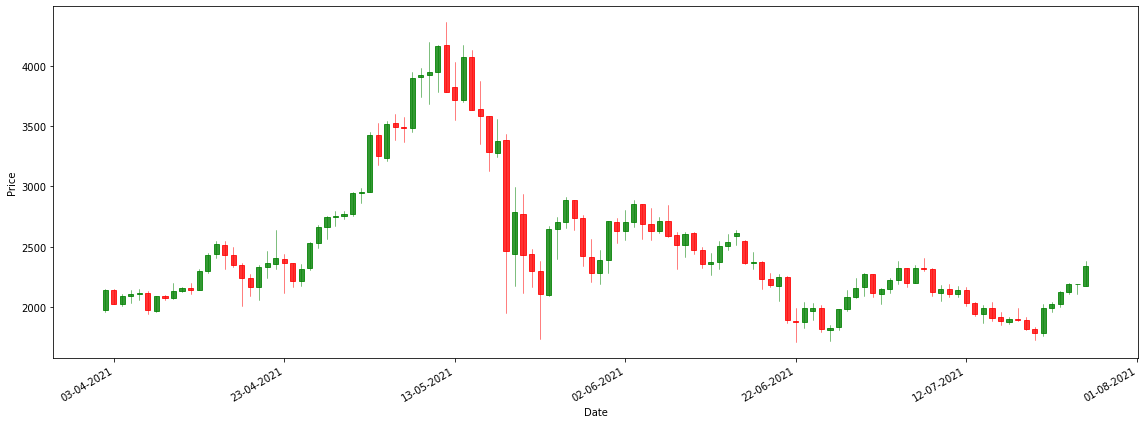

In [14]:
ohlc = df[(df['Date'] > '2021-04-01') & (df['Date'] <= '2021-07-26')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
fig, ax = plt.subplots(figsize = (16,6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

# Daily Percentage Change

The simple daily percentage change in closing price (without dividends and other factors) is the percentage change in the value of a stock over a single day of trading. It is defined by the following formula:

$$r_{t}=\frac{p_{t}}{p_{t-1}}-1$$

It's really useful as it indicates how **volatile** the currency is

In [15]:
df["returns"] = (df["Close"]/df["Close"].shift(1)) - 1

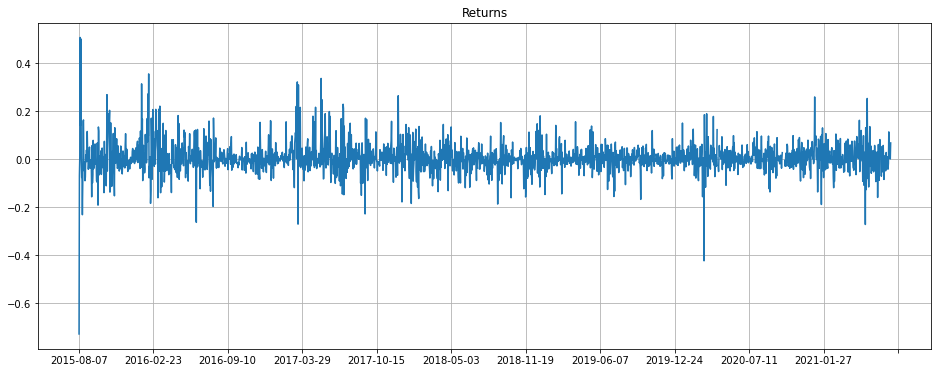

In [16]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['returns'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Returns')
plt.grid()
plt.show()

<AxesSubplot:>

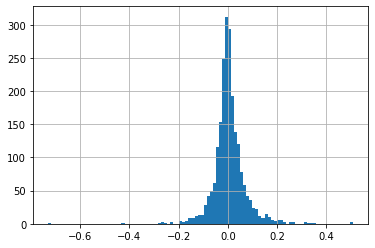

In [17]:
df["returns"].hist(bins=100)

In [18]:
df["returns"].describe()

count    2173.000000
mean        0.005239
std         0.064879
min        -0.728249
25%        -0.023096
50%         0.000717
75%         0.029766
max         0.507323
Name: returns, dtype: float64

<AxesSubplot:>

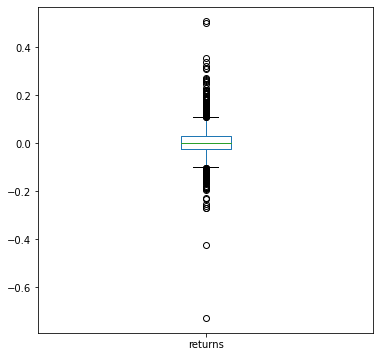

In [19]:
df["returns"].plot(kind = "box", figsize = (6,6))

# Cumulative Return

A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the amount of time involved. The cumulative return is expressed as a percentage, and it is the raw mathematical return of the following calculation: 

$$i_{t}=\left(1+r_{t}\right) i_{t-1}$$

In [20]:
df["Cumulative Return"] = (1 + df["returns"]).cumprod()

In [21]:
df

Date         Open         High          Low        Close  \
0     2015-08-07     2.831620     3.536610     2.521120     2.772120   
1     2015-08-08     2.793760     2.798810     0.714725     0.753325   
2     2015-08-09     0.706136     0.879810     0.629191     0.701897   
3     2015-08-10     0.713989     0.729854     0.636546     0.708448   
4     2015-08-11     0.708087     1.131410     0.663235     1.067860   
...          ...          ...          ...          ...          ...   
2176  2021-07-22  1994.822876  2044.116455  1954.297852  2025.202759   
2177  2021-07-23  2025.105713  2129.441162  2000.436279  2124.776611   
2178  2021-07-24  2123.961182  2197.649414  2107.323486  2189.218750   
2179  2021-07-25  2187.145508  2194.438232  2108.829834  2191.373779   
2180  2021-07-26  2177.329590  2384.400635  2177.329590  2340.090820   

            Volume        100ma  Total Traded   returns  Cumulative Return  
0     1.643290e+05     2.772120  4.653173e+05       NaN                NaN  
1     6.741880e+05     1.762723  1.883519e+06 -0.728249           0.271751  
2     5.321700e+05     1.409114  3.757844e+05 -0.068268           0.253199  
3     4.052830e+05     1.233947  2.893676e+05  0.009333           0.255562  
4     1.463100e+06     1.200730  1.036002e+06  0.507323           0.385214  
...            ...          ...           ...       ...                ...  
2176  1.749548e+10  2543.801423  3.490038e+13  0.017194         630.198125  
2177  1.620039e+10  2540.698140  3.280751e+13  0.049167         661.183296  
2178  1.605745e+10  2537.399165  3.410539e+13  0.030329         681.236259  
2179  1.456648e+10  2534.993437  3.185902e+13  0.000984         681.906856  
2180  2.389353e+10  2534.945395  5.202409e+13  0.067865         728.184297  

[2181 rows x 10 columns]

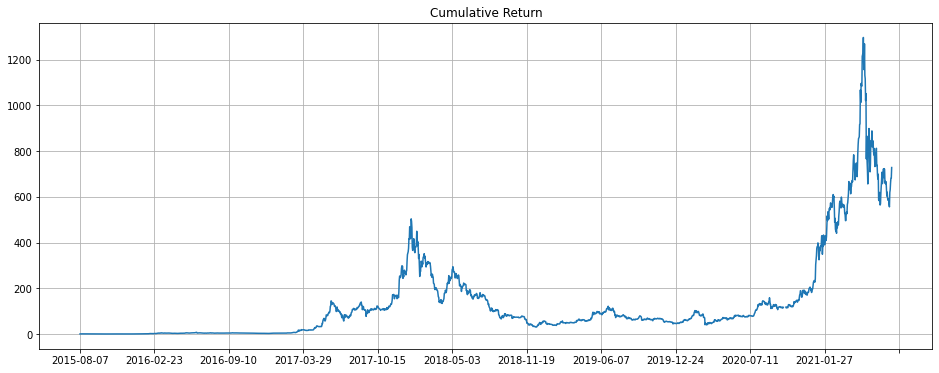

In [22]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['Cumulative Return'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [23]:
df.iloc[df['Cumulative Return'].argmax()]

Date                            2021-05-11
Open                           3948.271973
High                           4178.208984
Low                            3783.889404
Close                          4168.701172
Volume                       52679737865.0
100ma                           2094.01106
Total Traded         207993932557366.34375
returns                           0.054755
Cumulative Return               1297.20723
Name: 2104, dtype: object

# **Conclusion** : 

We see that **May 2021** was the best time to sell if you want the most profit after that the value of Ethereum kinda went down, also **2017** was also a good time for Ethereum, if you have been investing since the start you would have gained **730%** in returns and if you sold at the peak you would have gained **1300%**, We also notice that Ethereum is highly **volatile** so one should be very cautious while investing.

Cryptocurrency in general are quite volatile this is the case for many reasons and as I'm a financial expert I'm gonna an article i searched for :
>Many of the reasons for price volatility in mainstream markets hold true for cryptocurrencies as well. News developments and speculation are responsible for fueling price swings in crypto and mainstream markets alike. But their effect is exaggerated in crypto markets as they have less liquidity than traditional financial markets — a result of crypto markets lacking a robust ecosystem of institutional investors and large trading firms. Heightened volatility and a lack of liquidity can create a dangerous combination because both feed off of each other. Other than bitcoin, most other cryptocurrencies also lack established and widely adopted derivatives markets. Under the sway of day traders and speculators, crypto prices sometimes exhibit healthy volatility of the type we see in mainstream markets.

* Source : https://www.gemini.com/cryptopedia/volatility-index-crypto-market-price

But I still think that Ethereum still has a bright future especially after the recent developments of **Ethereum 2.0**